In [8]:
# data requirements
import pandas as pd
import numpy as np
# charting requirements
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams.update({'font.family': 'avenir'})
plt.style.use('seaborn-v0_8-whitegrid')

In [10]:
!python clean-pipe.py ../../Data/parlay_data_sample_v1_07March24.csv

Reading Data.
Transforming!
Saving Modified Data.!
Done!


In [11]:
data = pd.read_csv("parlay_data_sample_cleaned_v1.csv")
data

/var/folders/5r/pnlff12n2d55g65_tnn3b1pw0000gn/T/ipykernel_82152/582191055.py:1: DtypeWarning: Columns (25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("parlay_data_sample_cleaned_v1.csv")


,loan_id,period_start,probability_of_default,loss_given_default,expected_loss,lumos_score,rate_type,franchise,franchise_name,borrstate,...,state_unemployment_rate,county_unemployment,state_unemployment,county_employment,state_employment,county_labor_force,state_labor_force,state_civilian_labor_population,state_employment_pop_ratio,state_labor_force_participation_rate
0,0,2020-07-31,1.38,18.39,0.25,100,F,False,NaN,KS,...,7.1,20696.0,105788.0,323149.0,1383213.0,343845.0,1489001.0,2247710.0,61.5,66.2
1,1,2019-11-30,1.83,30.18,0.55,94,V,False,NaN,IL,...,3.4,13875.0,221403.0,491661.0,6341422.0,505536.0,6562825.0,10124996.0,62.6,64.8
2,2,2015-08-31,5.05,66.34,3.35,81,V,False,NaN,CO,...,3.7,1130.0,104227.0,29960.0,2736370.0,31090.0,2840597.0,4237868.0,64.6,67.0
3,3,2009-12-31,3.92,42.93,1.68,86,V,False,NaN,CT,...,8.6,42534.0,161898.0,424146.0,1730674.0,466680.0,1892572.0,2754731.0,62.8,68.7
4,4,2018-10-31,2.96,47.49,1.41,88,F,False,NaN,CA,...,3.9,45641.0,759367.0,1573536.0,18567776.0,1619177.0,19327143.0,30994913.0,59.9,62.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,19918,2012-06-30,0.57,74.76,0.43,96,V,False,NaN,CA,...,10.3,38225.0,1904599.0,396006.0,16540083.0,434231.0,18444682.0,29249074.0,56.5,63.1
99996,19919,2009-10-31,15.09,92.74,13.99,70,V,False,NaN,TX,...,8.3,103834.0,1002810.0,1053617.0,11027843.0,1157451.0,12030653.0,18163851.0,60.7,66.2
99997,19920,2012-02-29,4.51,63.45,2.86,82,V,False,NaN,MA,...,7.4,30400.0,255995.0,363859.0,3214950.0,394259.0,3470945.0,5326196.0,60.4,65.2
99998,19921,2018-03-31,2.36,64.90,1.53,87,V,False,NaN,MA,...,4.2,12577.0,156828.0,266945.0,3620258.0,279522.0,3777086.0,5679819.0,63.7,66.5


### Making a Deep copy to preserve original data

In [12]:
df = data.copy(deep=True)

### Missing value assessment

<Axes: >

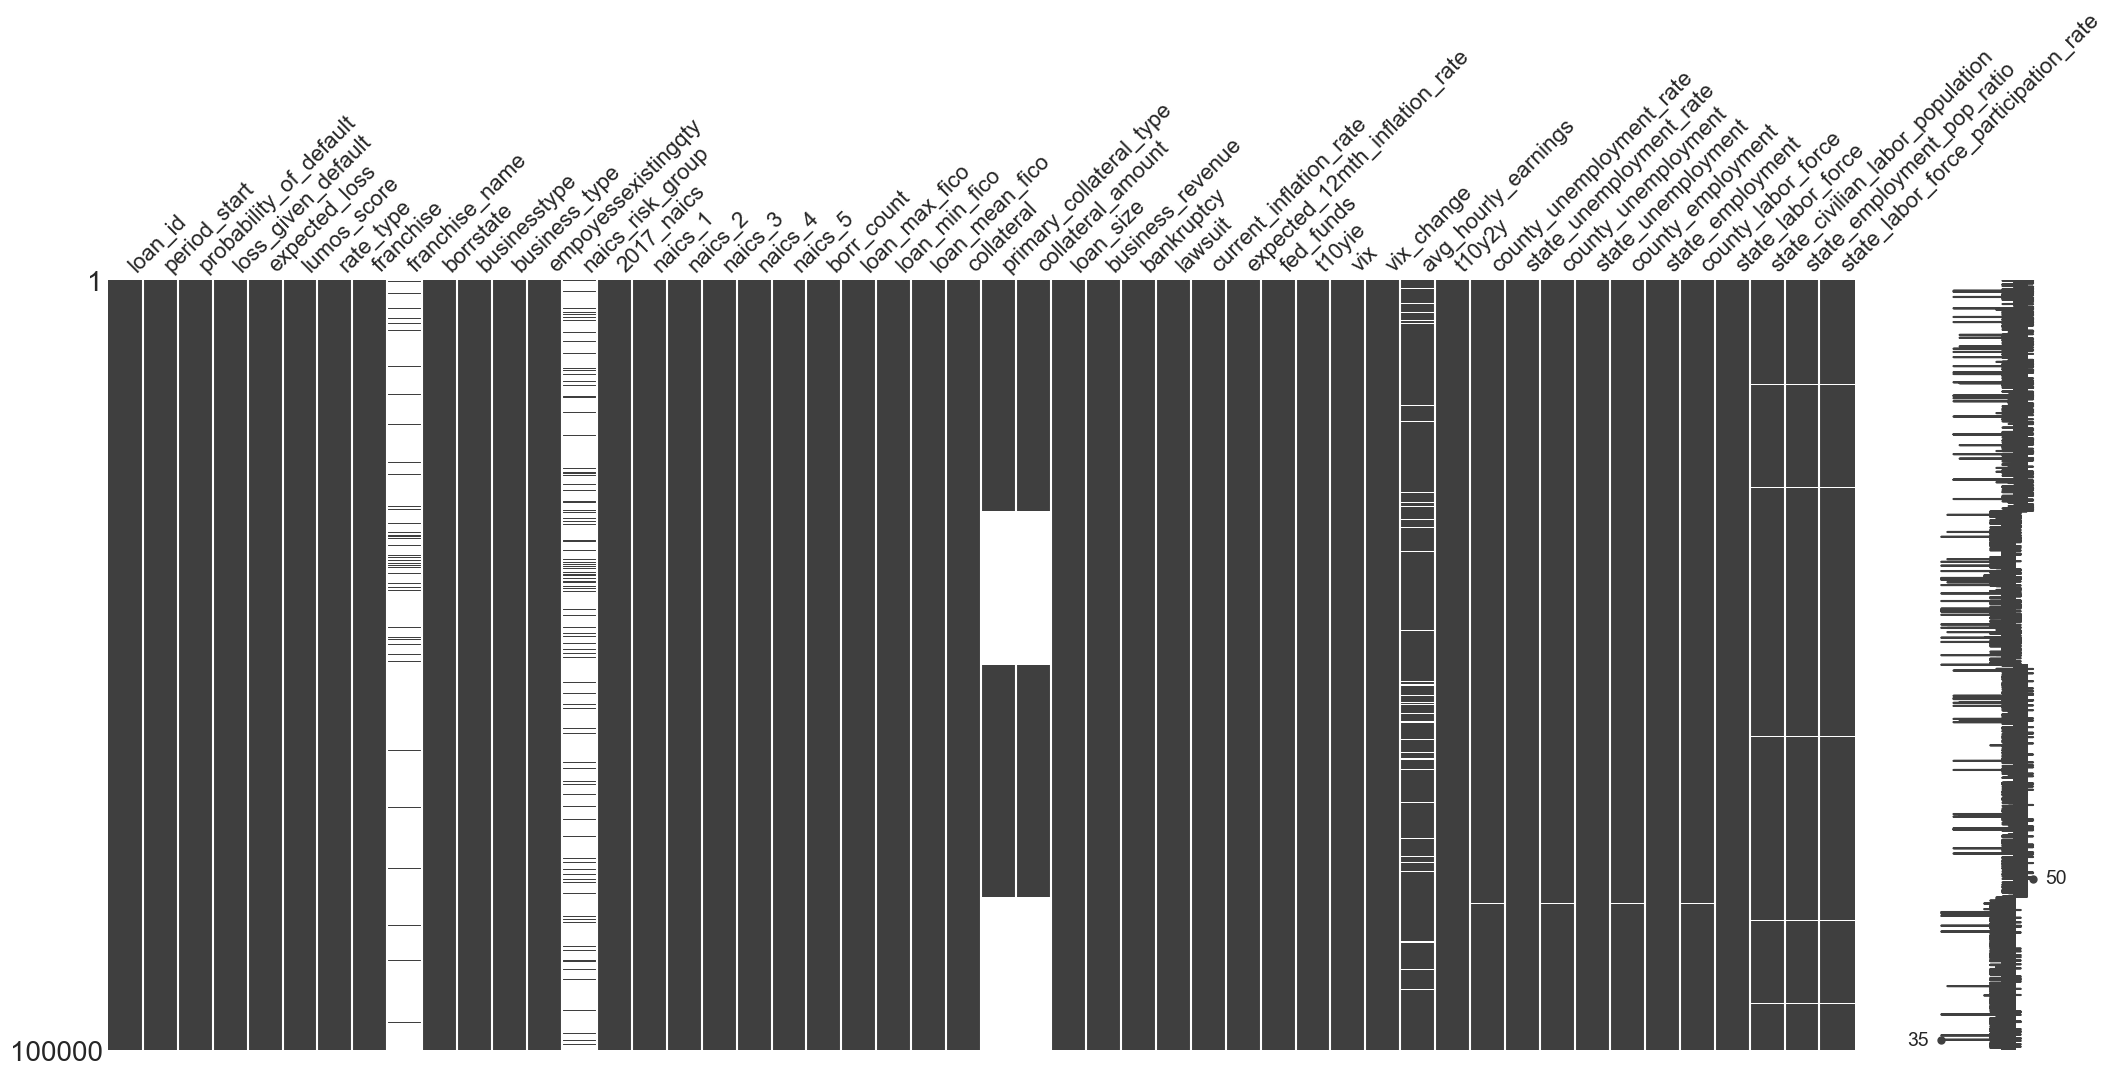

In [13]:
import missingno as msno
msno.matrix(df)

/var/folders/5r/pnlff12n2d55g65_tnn3b1pw0000gn/T/ipykernel_82152/1538364312.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=notnone, y='index', x=0, palette='grey')


Text(0.5, 1.0, 'Missing values')

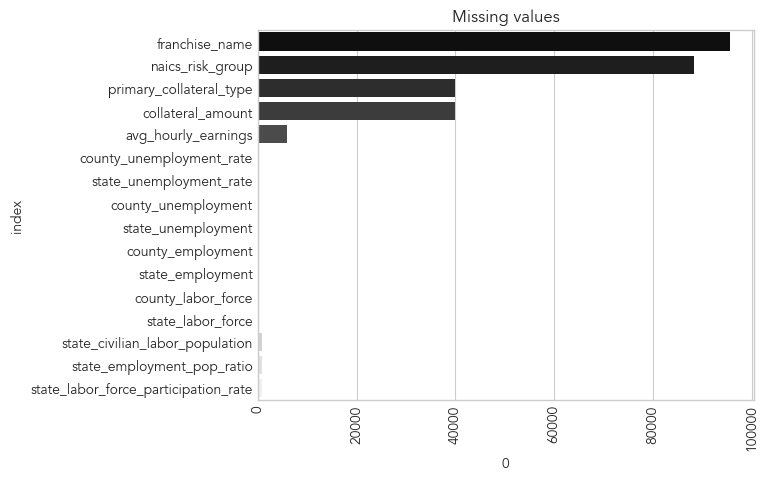

In [14]:
plt.rcParams['font.family'] = 'avenir'
notnone = df.isna().sum()
notnone = pd.DataFrame(notnone[notnone!=0]).reset_index()
sns.barplot(data=notnone, y='index', x=0, palette='grey')
plt.xticks(rotation=90)
plt.title("Missing values")

In [15]:
# storing franchise_names, naics_risk_group, primary_collateral_type
franchise_names = dict(df[['loan_id',"franchise_name"]].values)
naics_risk_group_categorization = dict(df[['loan_id','naics_risk_group']])
primary_collateral_type = dict(df[['loan_id','naics_risk_group']])
collateral_amount = dict(df[['loan_id','collateral_amount']])

In [16]:
df = df.drop(['primary_collateral_type','franchise_name','naics_risk_group','collateral_amount'],axis=1)

<Axes: >

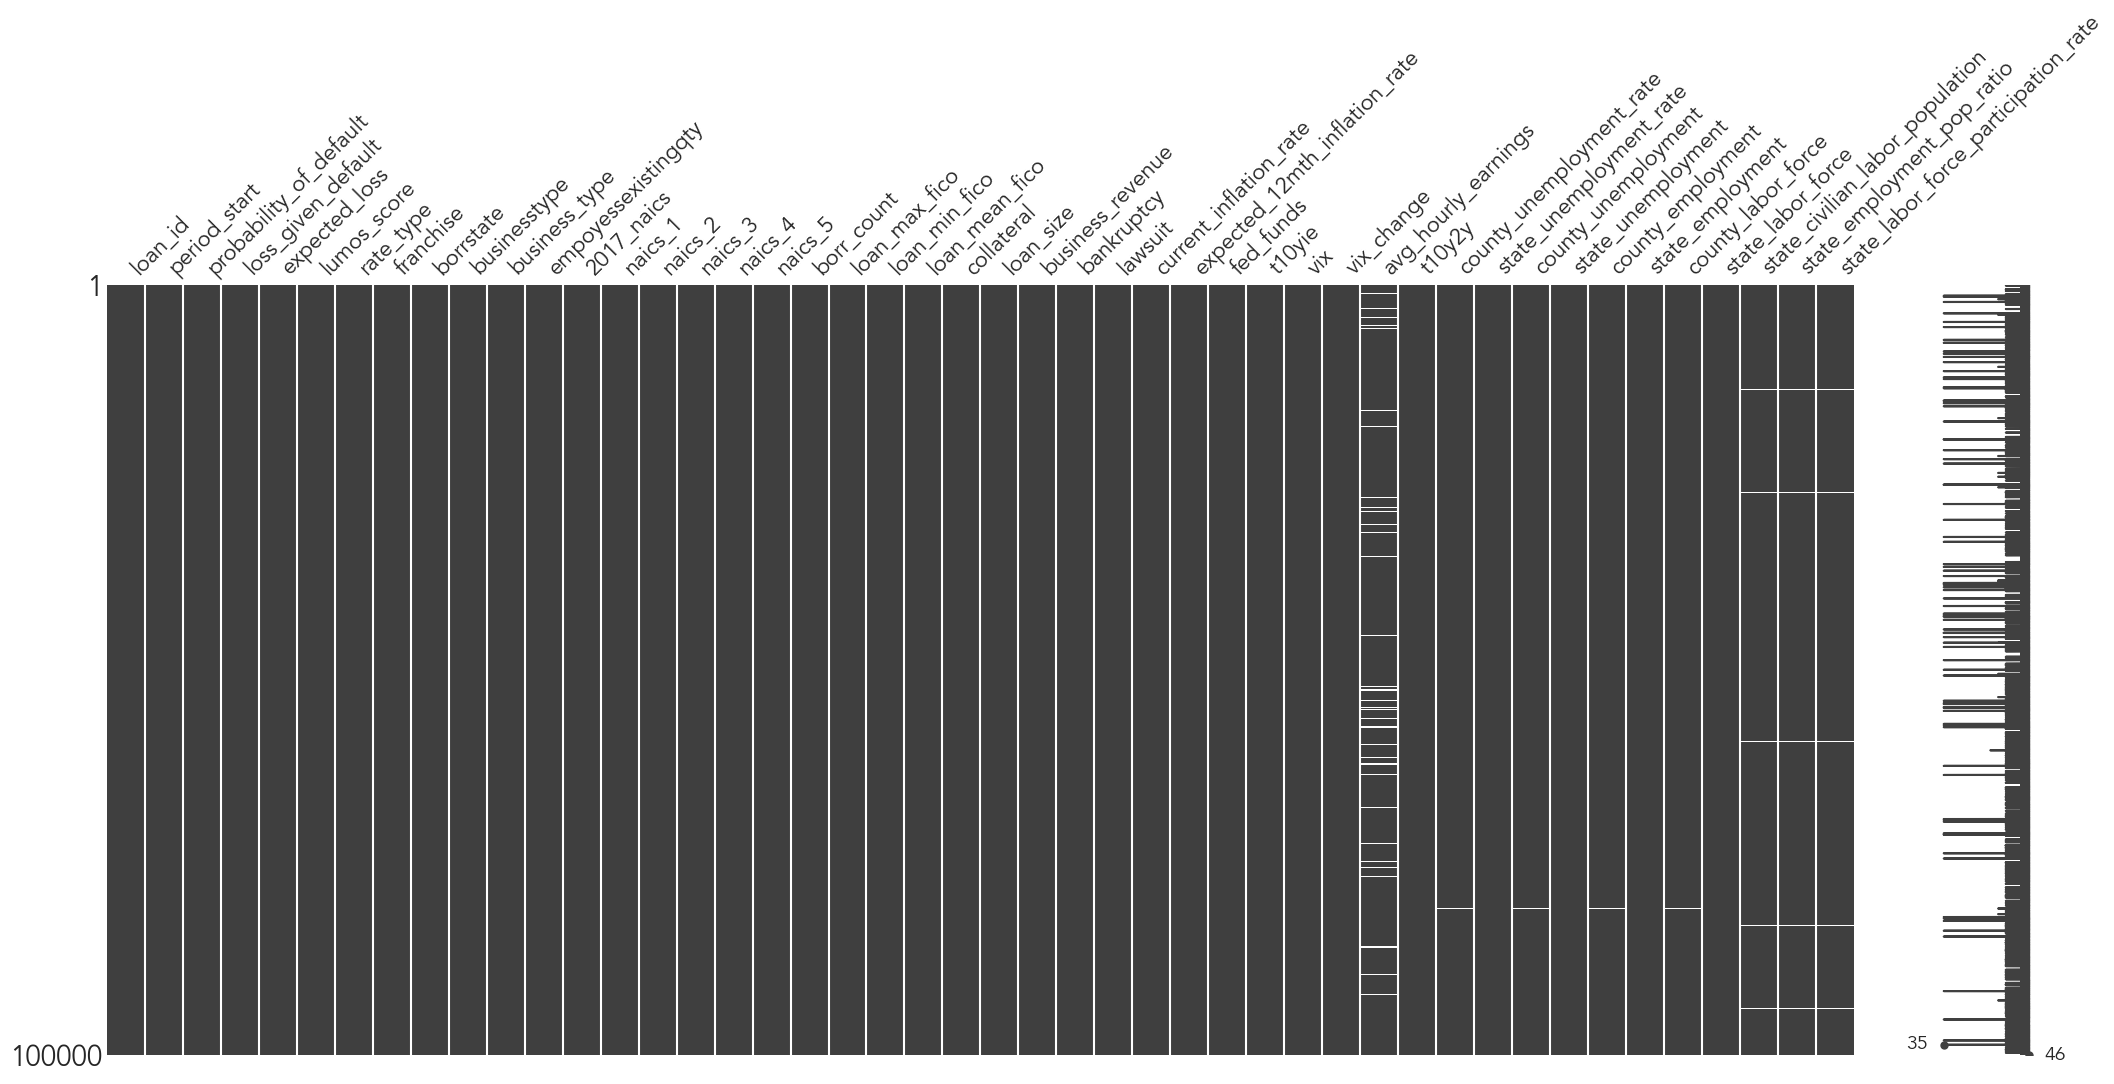

In [17]:
msno.matrix(df)

<Axes: ylabel='Frequency'>

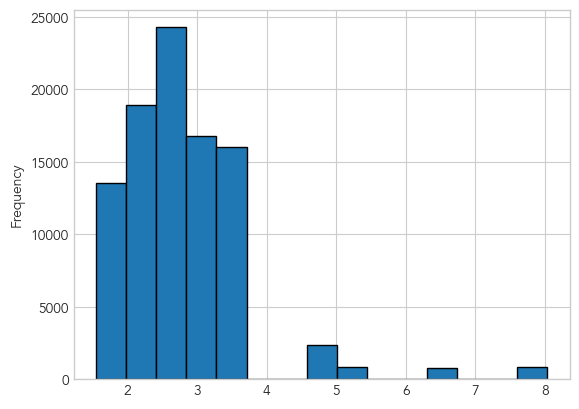

In [18]:
df['avg_hourly_earnings'].plot(kind='hist',bins=15, edgecolor='black')

In [19]:
df['avg_hourly_earnings'].mean()

2.786267932422244

In [20]:
df['avg_hourly_earnings'].median()

2.65

In [21]:
# percentage of missing 
(df['avg_hourly_earnings'].isna().sum()/df['avg_hourly_earnings'].shape[0])*100

5.827

In [22]:
df['avg_hourly_earnings'].isna().sum()

5827

### Correlation Study

In [23]:
numerical_data = df.copy(deep=True)

In [24]:
numerical_data = numerical_data.select_dtypes(include=['number'])

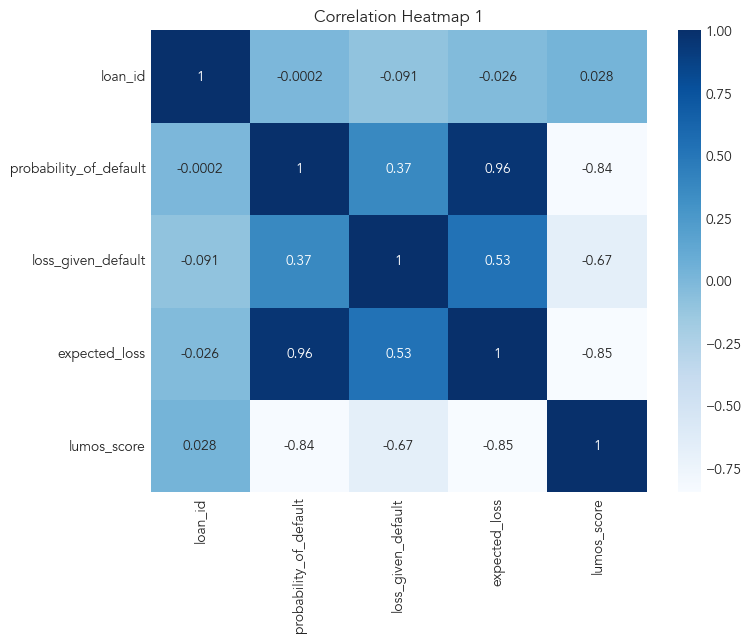

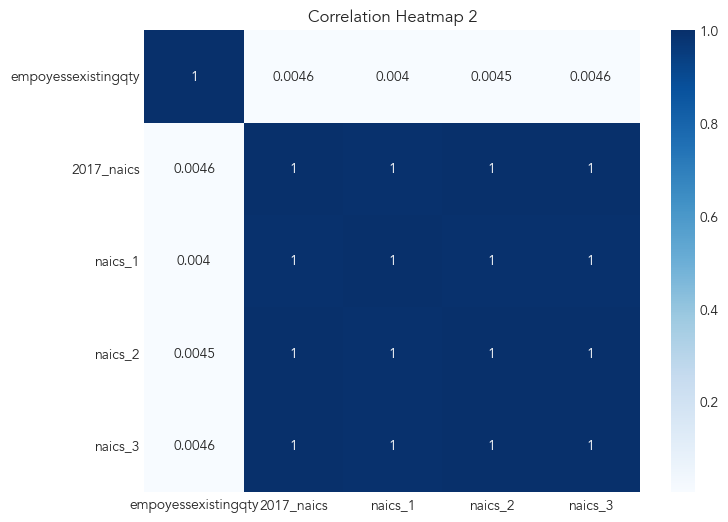

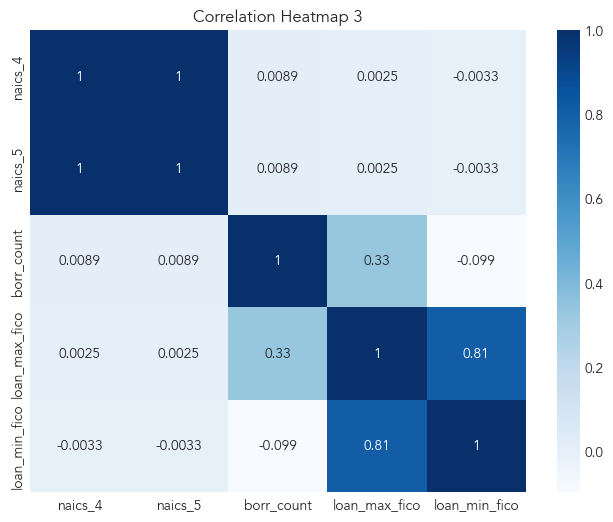

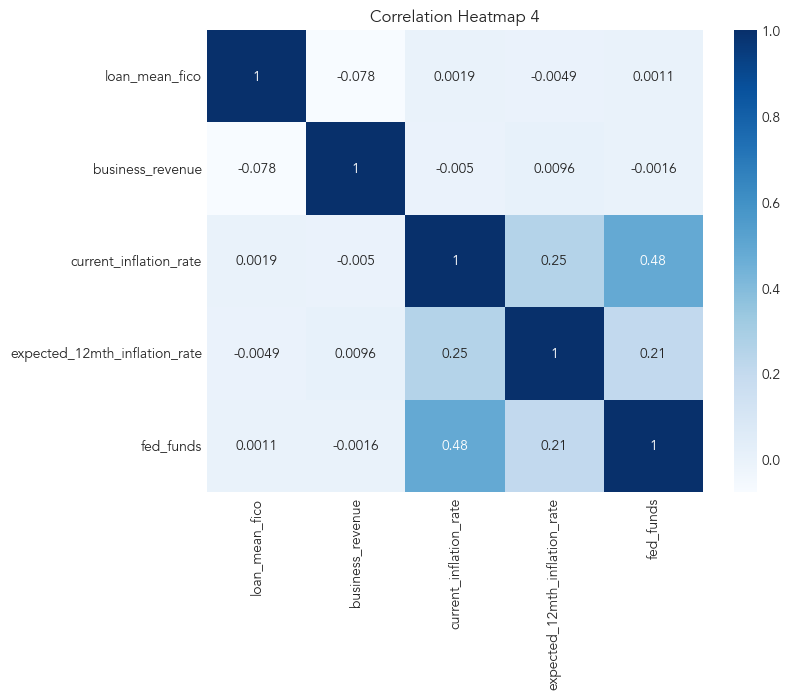

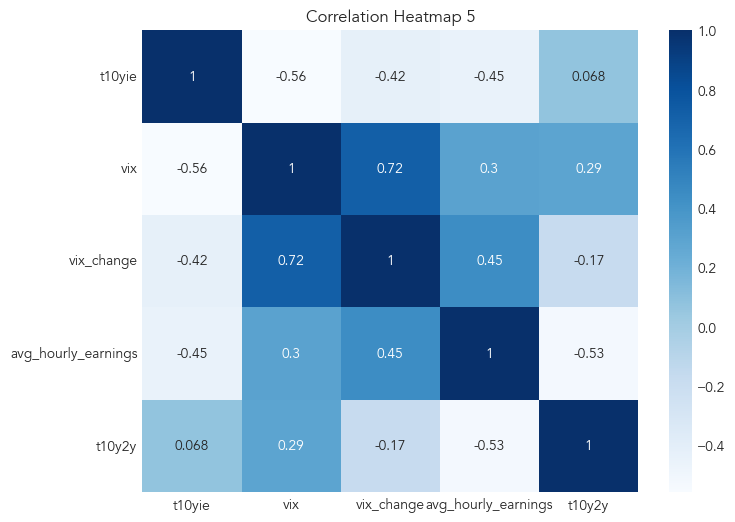

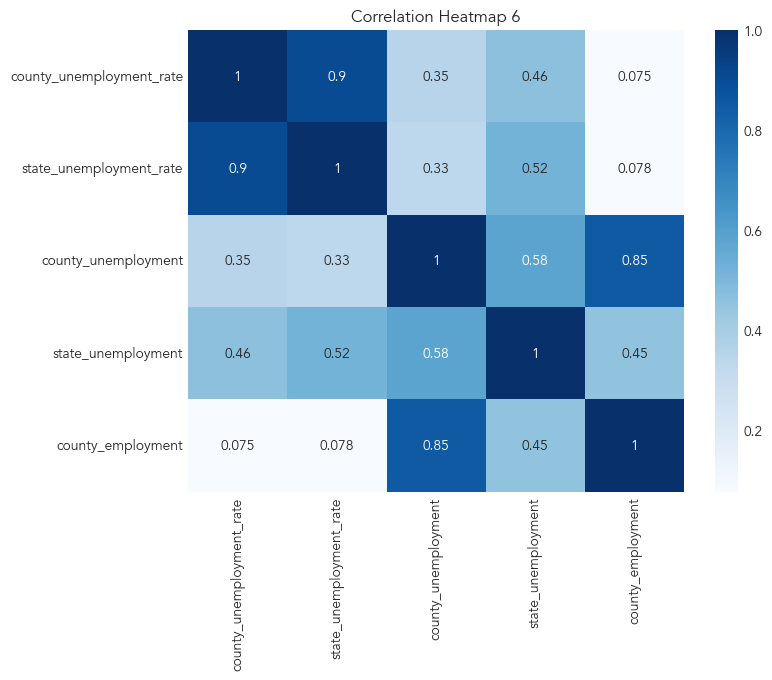

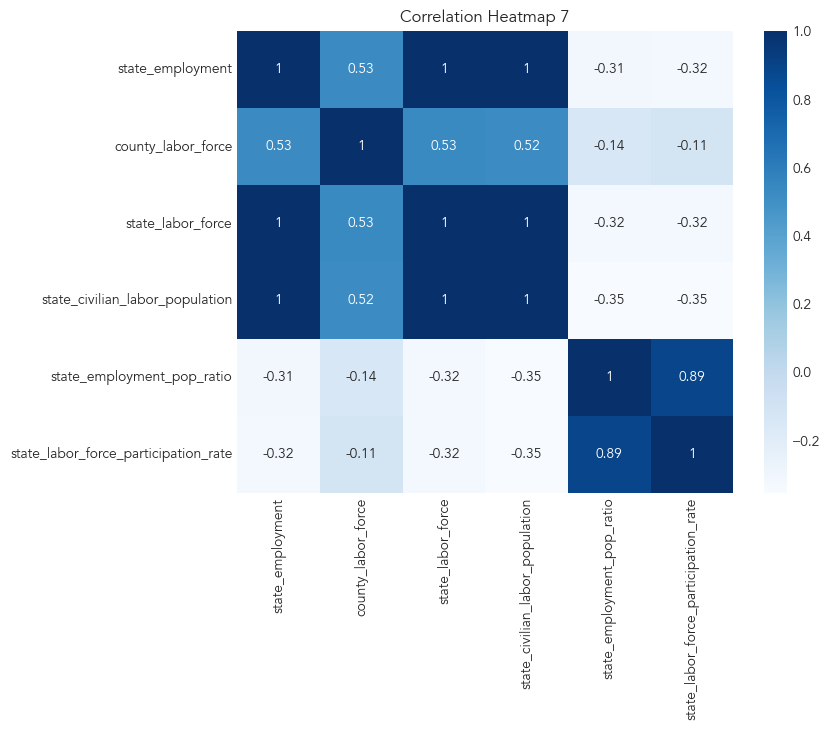

In [25]:


columns = numerical_data.columns

# Define the number of columns per heatmap
cols_per_heatmap = 5

# Loop through the columns and create individual heatmaps
for i in range(1, len(columns) // cols_per_heatmap + 1):
    start_index = (i - 1) * cols_per_heatmap
    end_index = min(i * cols_per_heatmap, len(columns))
    
    # Create a new figure for each heatmap
    plt.figure(figsize=(8, 6))
    
    if i == 1:
        subset_columns = columns[:end_index]
        plt.title(f'Correlation Heatmap first: {i}*5')
    elif i == len(columns) // cols_per_heatmap:
        subset_columns = columns[start_index:]
    else:
        subset_columns = columns[start_index:end_index]
    
    corr_mat = numerical_data[subset_columns].corr()
    sns.heatmap(corr_mat, cmap="Blues", annot=True)
    plt.title(f'Correlation Heatmap {i}')
    plt.show()

<Axes: >

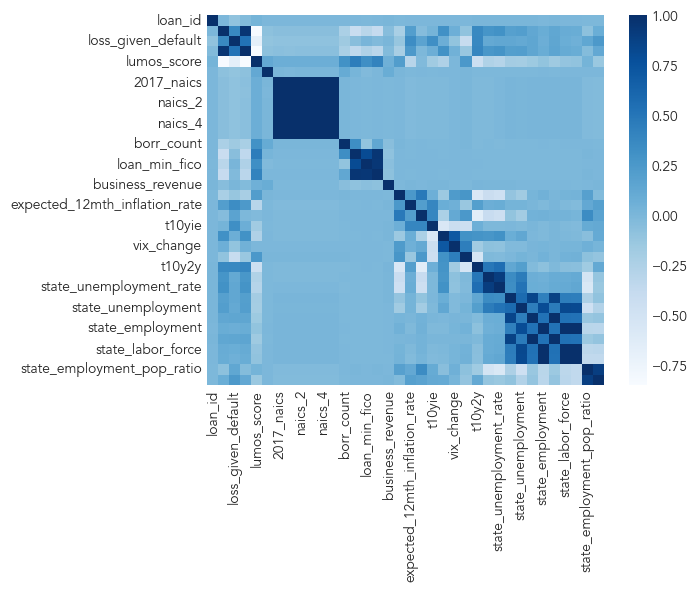

In [29]:
sns.heatmap(numerical_data.corr(), cmap="Blues")

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Assuming test is your DataFrame and it includes 'probability_of_default' along with other features
# Define your features (X) and target (y)
X = test.drop('probability_of_default', axis=1)
y = test['probability_of_default']

# Encode categorical variables if necessary
# For simplicity, this step is not shown here, but you can use pd.get_dummies() or sklearn's OneHotEncoder

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Getting feature importances
importances = rf_regressor.feature_importances_

# Mapping these importances to the corresponding features
features_test = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(features_test)

                                 Feature  Importance
2                          expected_loss    0.934293
1                     loss_given_default    0.061622
3                            lumos_score    0.002093
12                         loan_max_fico    0.001022
24              county_unemployment_rate    0.000064
20                                   vix    0.000060
14                        loan_mean_fico    0.000054
23                                t10y2y    0.000049
0                                loan_id    0.000045
4                    empoyessexistingqty    0.000043
34  state_labor_force_participation_rate    0.000042
13                         loan_min_fico    0.000040
22                   avg_hourly_earnings    0.000038
31                     state_labor_force    0.000038
28                     county_employment    0.000038
15                      business_revenue    0.000033
26                   county_unemployment    0.000033
25               state_unemployment_rate    0.

In [145]:
df

,loan_id,period_start,probability_of_default,loss_given_default,expected_loss,lumos_score,rate_type,franchise,borrstate,businesstype,...,state_unemployment_rate,county_unemployment,state_unemployment,county_employment,state_employment,county_labor_force,state_labor_force,state_civilian_labor_population,state_employment_pop_ratio,state_labor_force_participation_rate
0,0,2020-07-31,1.38,18.39,0.25,100,F,False,KS,CORPORATION,...,7.1,20696.0,105788.0,323149.0,1383213.0,343845.0,1489001.0,2247710.0,61.5,66.2
1,1,2019-11-30,1.83,30.18,0.55,94,V,False,IL,CORPORATION,...,3.4,13875.0,221403.0,491661.0,6341422.0,505536.0,6562825.0,10124996.0,62.6,64.8
2,2,2015-08-31,5.05,66.34,3.35,81,V,False,CO,CORPORATION,...,3.7,1130.0,104227.0,29960.0,2736370.0,31090.0,2840597.0,4237868.0,64.6,67.0
3,3,2009-12-31,3.92,42.93,1.68,86,V,False,CT,CORPORATION,...,8.6,42534.0,161898.0,424146.0,1730674.0,466680.0,1892572.0,2754731.0,62.8,68.7
4,4,2018-10-31,2.96,47.49,1.41,88,F,False,CA,CORPORATION,...,3.9,45641.0,759367.0,1573536.0,18567776.0,1619177.0,19327143.0,30994913.0,59.9,62.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,19918,2012-06-30,0.57,74.76,0.43,96,V,False,CA,CORPORATION,...,10.3,38225.0,1904599.0,396006.0,16540083.0,434231.0,18444682.0,29249074.0,56.5,63.1
99996,19919,2009-10-31,15.09,92.74,13.99,70,V,False,TX,CORPORATION,...,8.3,103834.0,1002810.0,1053617.0,11027843.0,1157451.0,12030653.0,18163851.0,60.7,66.2
99997,19920,2012-02-29,4.51,63.45,2.86,82,V,False,MA,CORPORATION,...,7.4,30400.0,255995.0,363859.0,3214950.0,394259.0,3470945.0,5326196.0,60.4,65.2
99998,19921,2018-03-31,2.36,64.90,1.53,87,V,False,MA,CORPORATION,...,4.2,12577.0,156828.0,266945.0,3620258.0,279522.0,3777086.0,5679819.0,63.7,66.5


In [128]:
features_test

,Feature,Importance
2,expected_loss,0.934293
1,loss_given_default,0.061622
3,lumos_score,0.002093
12,loan_max_fico,0.001022
24,county_unemployment_rate,0.000064
20,vix,0.000060
14,loan_mean_fico,0.000054
23,t10y2y,0.000049
0,loan_id,0.000045
4,empoyessexistingqty,0.000043


In [26]:
data.iloc[data['probability_of_default'].argmax()]

loan_id                                                             8644
period_start                                                  2017-07-31
probability_of_default                                             56.95
loss_given_default                                                 57.44
expected_loss                                                      32.71
lumos_score                                                           62
rate_type                                                              V
franchise                                                           True
franchise_name                          Always Best Care Senior Services
borrstate                                                             FL
businesstype                                                 CORPORATION
business_type                                               NEW BUSINESS
empoyessexistingqty                                                    7
naics_risk_group                                   